In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(
    './Job_Views.csv',
   names=[
        'applicant_id', 'job_id', 'title', 'position',
        'company', 'city', 'state_name', 'state_code',
        'industry', 'view_start', 'view_end',
        'view_duration', 'created_at', 'updated_at'],
   sep=","
)
# データ確認
print(df.shape)
print('===============')
print(df.info())
print('===============')
print(df.head(1))

(12370, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12370 entries, 0 to 12369
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   applicant_id   12370 non-null  int64  
 1   job_id         12370 non-null  int64  
 2   title          12370 non-null  object 
 3   position       12370 non-null  object 
 4   company        11790 non-null  object 
 5   city           12370 non-null  object 
 6   state_name     12348 non-null  object 
 7   state_code     12348 non-null  object 
 8   industry       2199 non-null   object 
 9   view_start     12370 non-null  object 
 10  view_end       10575 non-null  object 
 11  view_duration  10575 non-null  float64
 12  created_at     12370 non-null  object 
 13  updated_at     12370 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.3+ MB
None
   applicant_id  job_id                                  title  \
0         10000   73666  Cashiers & Valet

In [3]:
job_data_null = df.copy()
# null項目の検索
non_null_list = []
for col in df.columns:
    non_null = df[col].count()
    if non_null == 0:
        non_null_list.append(col)
print(non_null_list)

# 対象なしのため以下の処理は実施不要とする
# null項目を除外
# job_data_null.drop('null columns', axis=1)

[]


In [4]:
job_data_out = job_data_null.copy()
# 考慮対象外項目を削除
job_data_out = job_data_out.drop('industry', axis=1)
job_data_out = job_data_out.drop('view_start', axis=1)
job_data_out = job_data_out.drop('view_end', axis=1)
job_data_out = job_data_out.drop('created_at', axis=1)
job_data_out = job_data_out.drop('updated_at', axis=1)
job_data_out.columns

Index(['applicant_id', 'job_id', 'title', 'position', 'company', 'city',
       'state_name', 'state_code', 'view_duration'],
      dtype='object')

In [5]:
# 相関性のある項目の確認
print(job_data_out['state_name'].value_counts().head())
print('===============')
print(job_data_out['state_code'].value_counts().head())
print('===============')

job_data_relation = job_data_out.copy()
# 相関性の高い項目の除外
job_data_relation = job_data_relation.drop('state_name', axis=1)
print(job_data_relation.columns.values)

California    2735
New York      1081
Illinois       929
Florida        609
Texas          601
Name: state_name, dtype: int64
CA    2735
NY    1081
IL     929
FL     609
TX     601
Name: state_code, dtype: int64
['applicant_id' 'job_id' 'title' 'position' 'company' 'city' 'state_code'
 'view_duration']


In [6]:
# 統計量の確認
job_data_relation.astype('str').describe()

,applicant_id,job_id,title,position,company,city,state_code,view_duration
count,12370,12370,12370,12370,12370,12370,12370,12370
unique,3448,7047,4518,4059,2056,1632,50,1176
top,601,221890,Package Handler - Part-Time @ UPS,Administrative Assistant,OfficeTeam,Los Angeles,CA,nan
freq,75,114,200,330,1039,441,2735,1795


In [7]:
# 対象なしのため以下の処理は実施不要とする
# カラム値が同一の項目の除外
# job_data.drop('non', axis=1)

In [8]:
job_data_mold = job_data_relation.copy()
# 型変換
job_data_mold['company'].replace().astype(str) # str型に変換
job_data_mold['city'].replace().astype(str) # str型に変換
job_data_mold['state_code'].replace().astype(str) # str型に変換
# job_data_mold.info()

0        NJ
1        NY
2        WA
3        SC
4        SC
         ..
12365    CA
12366    CA
12367    CA
12368    CA
12369    CA
Name: state_code, Length: 12370, dtype: object

In [9]:
job_data_lost = job_data_mold.copy()
# カテゴリ変数の欠損値処理
print(job_data_lost.isnull().sum())
print('===============')
job_data_lost['company'] = job_data_lost['company'].fillna('other')
job_data_lost.dropna(subset = ['state_code'], inplace = True) # nanの行のみ削除
job_data_lost['view_duration'] = job_data_lost['view_duration'].fillna(0)
print('＜欠損値処理結果＞')
print(job_data_lost.isnull().sum())
print('===============')

applicant_id        0
job_id              0
title               0
position            0
company           580
city                0
state_code         22
view_duration    1795
dtype: int64
＜欠損値処理結果＞
applicant_id     0
job_id           0
title            0
position         0
company          0
city             0
state_code       0
view_duration    0
dtype: int64


,applicant_id,job_id,title,position,company,city,state_code,view_duration
0,10000,73666,651,580,1971,983,30,1129.0


In [ ]:
# カテゴリ変数処理
#ラベル・エンコーディング
# title, position, company, city, state_code
le = LabelEncoder()
data = ['title', 'position', 'company', 'city', 'state_code']
job_data_lost[data[0]] = le.fit_transform(job_data_lost[data[0]].values)
job_data_lost[data[1]] = le.fit_transform(job_data_lost[data[1]].values)
job_data_lost[data[2]] = le.fit_transform(job_data_lost[data[2]].values)
job_data_lost[data[3]] = le.fit_transform(job_data_lost[data[3]].values)
job_data_lost[data[4]] = le.fit_transform(job_data_lost[data[4]].values)
job_data_lost.head(1)

In [10]:
job_data_time = job_data_lost.copy()
# タイムゾーン（JST/UTC）変換
# job_data_time['view_start'] = pd.to_datetime(job_data_time['view_start'], utc=False)
# job_data_time['view_start'] = job_data_time['view_start'].astype('datetime64[ns]')
# job_data_time['view_start'] = job_data_time['view_start'].astype('int')

# job_data_time['view_end'] = pd.to_datetime(job_data_time['view_end'], utc=False)
# job_data_time['view_end'] = job_data_time['view_end'].astype('datetime64[ns]')
# job_data_time['view_end'] = job_data_time['view_end'].fillna(np.min(job_data_time['view_end']))
# job_data_time['view_end'] = job_data_time['view_end'].astype('int')

# print(job_data_time.isnull().sum())

In [11]:
# 型変換
data = ['title', 'position', 'company', 'city', 'state_code', 'view_duration']
job_data_time[data[0]] = job_data_time[data[0]].replace().astype(int)
job_data_time[data[1]] = job_data_time[data[1]].replace().astype(int)
job_data_time[data[2]] = job_data_time[data[2]].replace().astype(int)
job_data_time[data[3]] = job_data_time[data[3]].replace().astype(int)
job_data_time[data[4]] = job_data_time[data[4]].replace().astype(int)
job_data_time[data[5]] = job_data_time[data[5]].replace().astype(int)

Index(['applicant_id', 'job_id', 'title', 'position', 'company', 'city',
       'state_code', 'view_duration'],
      dtype='object')


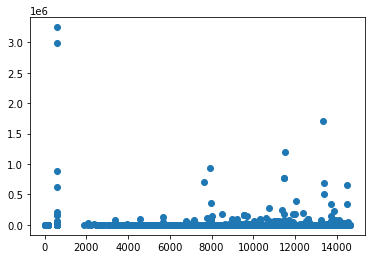

In [12]:
# 外れ値検出
data = job_data_time.values
job_data_time.shape
print(job_data_time.columns)
x = data[:, 0]
y = data[:, 7]
plt.scatter(x, y)

In [13]:
# 外れ値除去
job_data_outlier = job_data_time.copy()

print(job_data_outlier['view_duration'].astype('str').describe())
print('============')
print(job_data_outlier.sort_values('view_duration')['view_duration'].tail(6))
print('============')

outliers_list = []
for column in job_data_outlier.columns:
        outlier = job_data_outlier[column]
for num in outlier:
        if num > 2800000.0:
            outliers_list.append(num)
print(outliers_list)

count     12348
unique     1170
top           0
freq       2003
Name: view_duration, dtype: object
9060      880522
10058     933748
3110     1191657
6374     1711965
9042     2984851
9044     3248075
Name: view_duration, dtype: int64
[2984851, 3248075]


In [14]:
job_data_outlier = job_data_time.copy()
#条件にマッチしたIndexを削除
drop_index = job_data_outlier.index[job_data_outlier['view_duration'] > 2900000]
job_data_outlier = job_data_outlier.drop(drop_index)

print(job_data_time.shape)
print('============')
print(job_data_outlier.shape)

(12348, 8)
(12347, 8)


In [15]:
# 学習データとテストデータに分割
train_set, test_set = train_test_split(job_data_time, test_size=0.2, random_state=1)
print(train_set.shape)
print(test_set.shape)
print('=======================')

# 説明変数と目的変数に分割
#　学習データを説明変数データと目的変数データに分割
train_X = train_set.drop('job_id', axis=1)
train_y = train_set['job_id']
print(train_X.shape)
print(train_y.shape)
print('=======================')

#　テスト用データを説明変数データと目的変数データに分割
test_X = test_set.drop('job_id', axis=1)
test_y = test_set['job_id']
print(test_X.shape)
print(test_y.shape)

(9878, 8)
(2470, 8)
(9878, 7)
(9878,)
(2470, 7)
(2470,)


In [16]:
# 学習
model = GaussianNB()
model.fit(train_X, train_y)

GaussianNB()

In [17]:
# 機械学習モデルmodelに対する出力結果
pred = model.predict(test_X)
print(pred)

[ 97544  73957 221890 ... 134292  79848 235787]


In [ ]:
# 適合率算出
print(accuracy_score(pred, test_y))

In [19]:
# job_idとの紐づけ
pred_jobs = pd.Series(pred, index = test_X.index)

# 指定のjob_idとの関連の高い順にソート
jobs = pred_jobs.sort_values(ascending=False).index

# 上位10件を出力
output = list(jobs)[:10]
print(output)

[8718, 8709, 8639, 8659, 8648, 2181, 8427, 6025, 8463, 8426]
